In [1]:
import pandas_datareader as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
#import dataset
#import quandl
#df = quandl.get('NSE/TATAGLOBAL')
df = web.DataReader('TATAGLOBAL.BO', data_source='yahoo', start='2012-01-01', end='2020-05-19')
print(df.shape)
print(df.head)

(2059, 6)
<bound method NDFrame.head of                   High         Low  ...    Volume   Adj Close
Date                                ...                      
2012-01-02   91.750000   89.250000  ...  101612.0   79.811058
2012-01-03   94.849998   91.500000  ...  217321.0   83.015778
2012-01-04   96.750000   94.150002  ...  293955.0   83.542580
2012-01-05   95.199997   92.050003  ...  146324.0   81.523163
2012-01-06   94.500000   91.349998  ...  109755.0   82.313370
...                ...         ...  ...       ...         ...
2020-05-14  364.299988  350.799988  ...  153613.0  362.850006
2020-05-15  367.600006  349.200012  ...  283569.0  351.850006
2020-05-18  355.399994  343.500000  ...  146520.0  348.250000
2020-05-19  362.899994  349.600006  ...  195104.0  357.950012
2020-05-20  363.750000  356.700012  ...   78570.0  360.549988

[2059 rows x 6 columns]>


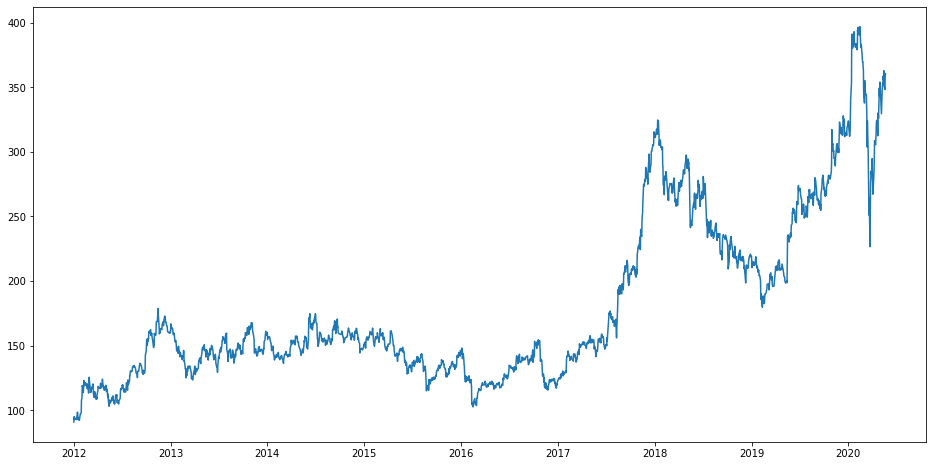

In [3]:
#Close variable plot distribution
#'Date' vs 'Close'
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price')


In [4]:
#getting close price
df=df[['Close']]
print(df.head)

<bound method NDFrame.head of                  Close
Date                  
2012-01-02   90.900002
2012-01-03   94.550003
2012-01-04   95.150002
2012-01-05   92.849998
2012-01-06   93.750000
...                ...
2020-05-14  362.850006
2020-05-15  351.850006
2020-05-18  348.250000
2020-05-19  357.950012
2020-05-20  360.549988

[2059 rows x 1 columns]>


In [5]:
#A variable for predicting 'n' days out into the future
forecast_out = 30
#creating column for the target or dependent variable Shifted 'n' units up
df['Prediction'] = df [['Close']].shift(-forecast_out)
print(df.head())
print(df.tail())


                Close  Prediction
Date                             
2012-01-02  90.900002  120.599998
2012-01-03  94.550003  120.699997
2012-01-04  95.150002  120.800003
2012-01-05  92.849998  119.150002
2012-01-06  93.750000  120.550003
                 Close  Prediction
Date                              
2020-05-14  362.850006         NaN
2020-05-15  351.850006         NaN
2020-05-18  348.250000         NaN
2020-05-19  357.950012         NaN
2020-05-20  360.549988         NaN


In [6]:
#Creating Independent Data (X) 
#convert the dataframe to numpy arrary
X = np.array(df.drop(['Prediction'],1))
#Remove the last 'n' rows
X = X[:-forecast_out]
X

array([[ 90.90000153],
       [ 94.55000305],
       [ 95.15000153],
       ...,
       [280.8999939 ],
       [294.79998779],
       [280.1499939 ]])

In [7]:
#creating the dependent dataset(y)
#convert the dataframe to numpy array (including NaN's)
y = np.array(df['Prediction'])
#get all of the y values except the last 'n' rows
y= y[:-forecast_out]
print(y)

[120.59999847 120.69999695 120.80000305 ... 348.25       357.95001221
 360.54998779]


In [0]:
#split the dataset into 80% of training and 20% of spliting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2)

In [9]:
#creating Linear model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
#Testing model Linear : score returns the coefficient of determination R^2 of the prediction
linear_score = lr.score(X_test,y_test)
linear_score

0.8594459949597631

In [11]:
#Creating SVR- support vector regressor
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma = 0.1)
svr_rbf.fit(X_train,y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [12]:
#Testing model SVR : score returns the coefficient of determination R^2 of the prediction
svm_score = svr_rbf.score(X_test,y_test)
svm_score

0.8892574672554531

In [13]:
#creating Decision Tree model
from sklearn.tree import DecisionTreeRegressor
dr = DecisionTreeRegressor(random_state = 0)
dr.fit(X_train,y_train)



DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [14]:
#Testing Decision Tree model  : score returns the coefficient of determination R^2 of the prediction
decision_tree_score = dr.score(X_test,y_test)
decision_tree_score

0.8419589210702684

In [15]:
#creating Random forest model
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators= 100, random_state=0)
rf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [16]:
#Testing Random forest model  : score returns the coefficient of determination R^2 of the prediction
Random_forest_score = rf.score(X_test,y_test)
Random_forest_score

0.8751152952199539

In [17]:
#setting x_forecast equal to the last 30 rows of the original dataset form Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
x_forecast

array([[267.25      ],
       [284.6499939 ],
       [294.54998779],
       [308.70001221],
       [305.54998779],
       [315.6499939 ],
       [323.04998779],
       [324.29998779],
       [324.6499939 ],
       [312.45001221],
       [330.1499939 ],
       [329.8500061 ],
       [325.8999939 ],
       [349.45001221],
       [343.04998779],
       [354.        ],
       [351.3500061 ],
       [334.75      ],
       [329.5       ],
       [335.54998779],
       [341.95001221],
       [348.75      ],
       [354.95001221],
       [358.70001221],
       [355.6499939 ],
       [362.8500061 ],
       [351.8500061 ],
       [348.25      ],
       [357.95001221],
       [360.54998779]])

In [18]:
#print the prediction for next 'n' days

#Linear Regression
lr_prediction = lr.predict(x_forecast)
print("The prediction of next 'n' days by Linear model", lr_prediction)

#Support Vector Regressor
svr_prediction = svr_rbf.predict(x_forecast)
print("The prediction of next 'n' days by Support Vector Reggressor model", svr_prediction)

#Decision Tree Regressor
decision_tree_prediction = dr.predict(x_forecast)
print("The prediction of next 'n' days by Decision Tree Reggressor model", decision_tree_prediction)

#Random Forest Regressor
random_forest_prediction = rf.predict(x_forecast)
print("The prediction of next 'n' days by random forest Reggressor model", random_forest_prediction)




The prediction of next 'n' days by Linear model [265.25908349 281.6978548  291.05094634 304.41928525 301.44327668
 310.98533121 317.97652948 319.15747611 319.48814694 307.96212513
 324.6843121  324.40089645 320.66909357 342.91814536 336.87167555
 347.21677956 344.71317847 329.03020147 324.07022562 329.78599578
 335.83246558 342.25680371 348.11431053 351.65715041 348.77562334
 355.57788746 345.18555712 341.78442506 350.94858244 353.40492836]
The prediction of next 'n' days by Support Vector Reggressor model [272.63731585 295.07861003 310.62546459 281.40093257 297.42475212
 361.24410874 381.60010656 341.01429115 326.8004415  373.71435928
 347.80007034 359.36692039 302.3826841  331.95088377 350.62401582
 351.3450276  356.8639865  241.45051588 370.56635882 242.95291638
 367.74720263 329.86582517 321.23921858 251.32425705 297.3063053
 319.45615378 364.40850687 329.73677232 251.78040759 275.65427093]
The prediction of next 'n' days by Decision Tree Reggressor model [238.55000305 258.45001221

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


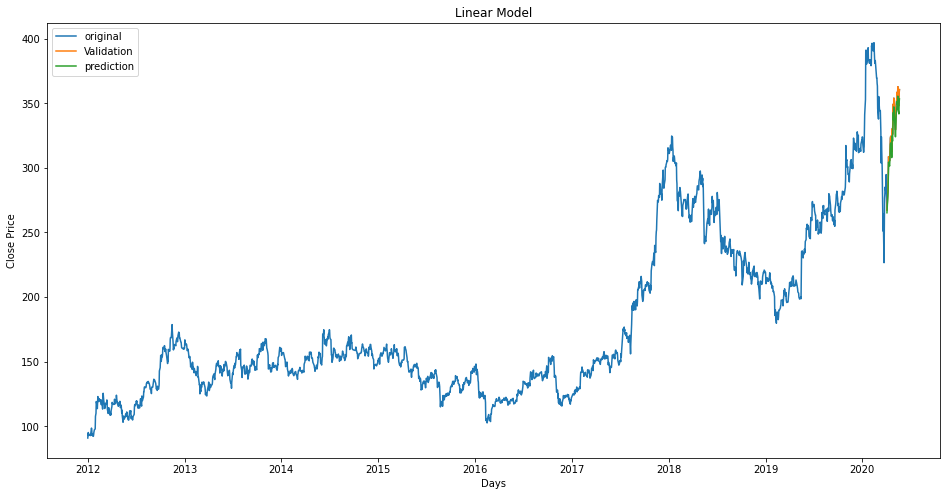

In [20]:
# Visualization

predictions = lr_prediction

valid = df[X.shape[0]:]
valid ['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Linear Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
# plt.plot(df['Close'][-forecast_out:])
# plt.plot(valid['predictions'])
plt.plot(df[['Close']])
plt.plot(valid[['Close','predictions']])
plt.legend(['original','Validation','prediction'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


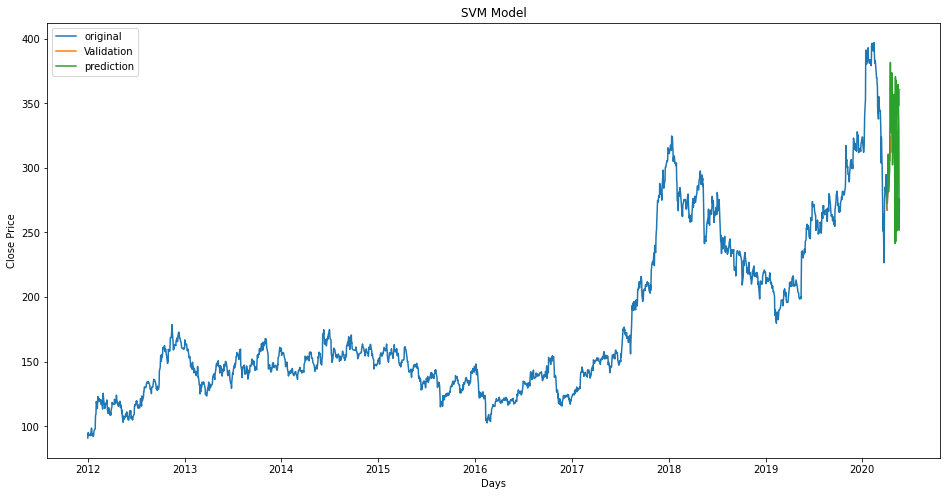

In [19]:
# Visualization

predictions = svr_prediction

valid = df[X.shape[0]:]
valid ['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('SVM Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
# plt.plot(df['Close'][-forecast_out:])
# plt.plot(valid['predictions'])
plt.plot(df[['Close']])
plt.plot(valid[['Close','predictions']])
plt.legend(['original','Validation','prediction'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


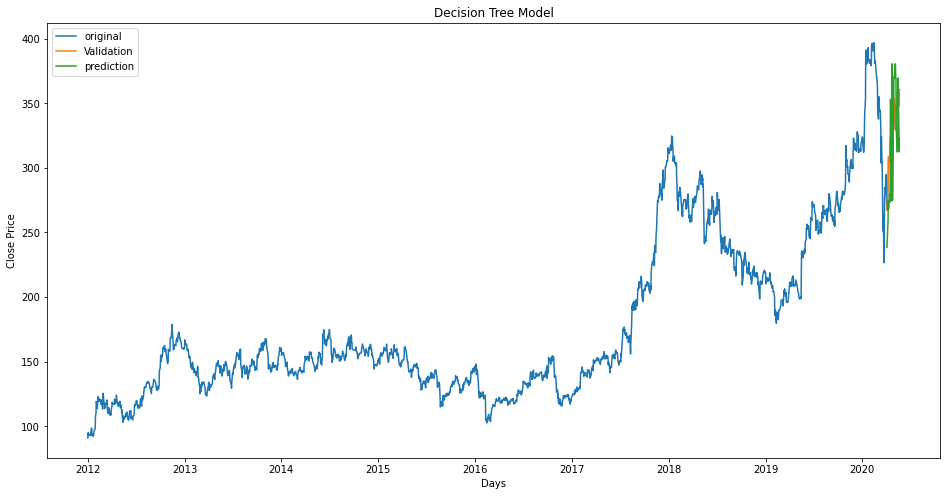

In [21]:
# Visualization

predictions = decision_tree_prediction

valid = df[X.shape[0]:]
valid ['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Decision Tree Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
#plt.plot(df['Close'][-30:])
#plt.plot(valid['predictions'])
plt.plot(df[['Close']])
plt.plot(valid[['Close','predictions']])
plt.legend(['original','Validation','prediction'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


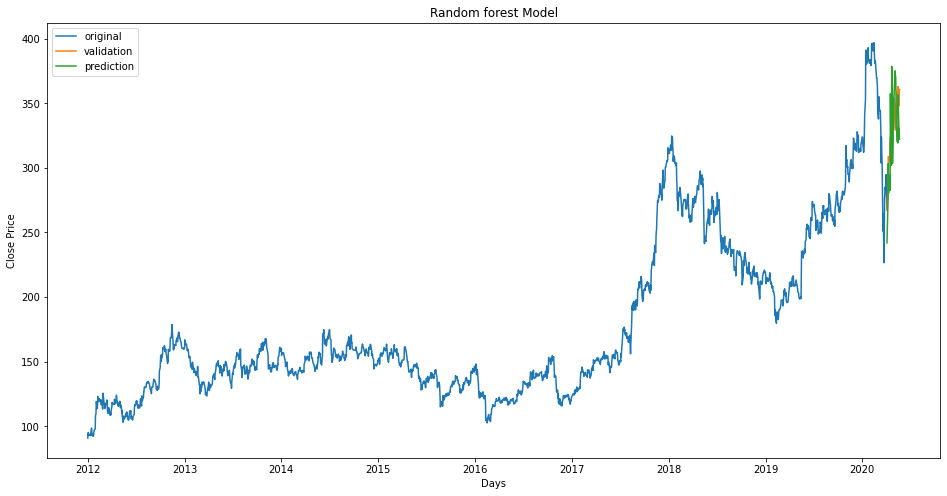

In [22]:
# Visualization

predictions = random_forest_prediction

valid = df[X.shape[0]:]
valid ['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Random forest Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
# plt.plot(df['Close'][-forecast_out:])
# plt.plot(valid['predictions'])
plt.plot(df[['Close']])
plt.plot(valid[['Close','predictions']])
plt.legend(['original','validation','prediction'])
plt.show()